In [1]:
# 📦 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 📅 Display settings
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style='whitegrid', palette='muted')
%matplotlib inline

In [3]:
# 📂 2. Load dataset
df = pd.read_csv('../data/Dataset - Sheet1.csv')

In [4]:
# 🔄 3. Preprocess
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df['CTR'] = df['Clicks'] / df['Impressions'].replace(0, np.nan)
df['Fill Rate'] = df['Impressions'] / df['Requests'].replace(0, np.nan)
df['Win Rate'] = df['Bids in auction'] / df['Bid requests'].replace(0, np.nan)

In [5]:
# 📊 4. Overview
print("Shape:", df.shape)
display(df.head())
display(df.describe())

Shape: (934, 12)


,Date,Country,Est. earnings (USD),Observed eCPM (USD),Requests,Impressions,Clicks,Bid requests,Bids in auction,CTR,Fill Rate,Win Rate
0,2021-01-01,United States,0.10,4.33,130,24,3,130,0,0.12,0.18,0.00
1,2021-01-02,Nigeria,0.06,2.93,137,19,0,137,0,0.00,0.14,0.00
2,2021-01-03,United Kingdom,0.19,6.39,180,30,2,180,0,0.07,0.17,0.00
3,2021-01-04,New Zealand,0.36,11.36,148,32,2,148,0,0.06,0.22,0.00
4,2021-01-05,France,0.09,3.94,143,23,1,143,0,0.04,0.16,0.00


,Date,Est. earnings (USD),Observed eCPM (USD),Requests,Impressions,Clicks,Bid requests,Bids in auction,CTR,Fill Rate,Win Rate
count,934,934.00,934.00,934.00,934.00,934.00,934.00,934.00,934.00,934.00,934.00
mean,2022-04-12 12:00:00,1.76,9.26,2424.64,172.73,7.55,2424.64,1046.25,0.05,0.09,0.38
min,2021-01-01 00:00:00,0.02,0.64,98.00,6.00,0.00,98.00,0.00,0.00,0.00,0.00
25%,2021-08-22 06:00:00,0.63,4.76,1475.75,104.00,3.00,1475.75,0.00,0.02,0.06,0.00
50%,2022-04-12 12:00:00,1.08,6.83,1916.00,161.00,6.00,1916.00,919.50,0.04,0.09,0.13
75%,2022-12-01 18:00:00,1.65,9.93,2777.75,228.75,10.00,2777.75,2058.75,0.06,0.12,0.85
max,2023-07-23 00:00:00,73.88,111.75,25527.00,848.00,60.00,25527.00,6519.00,0.54,0.35,1.00
std,NaN,4.44,9.94,2181.50,96.98,6.62,2181.50,1156.77,0.05,0.05,0.42


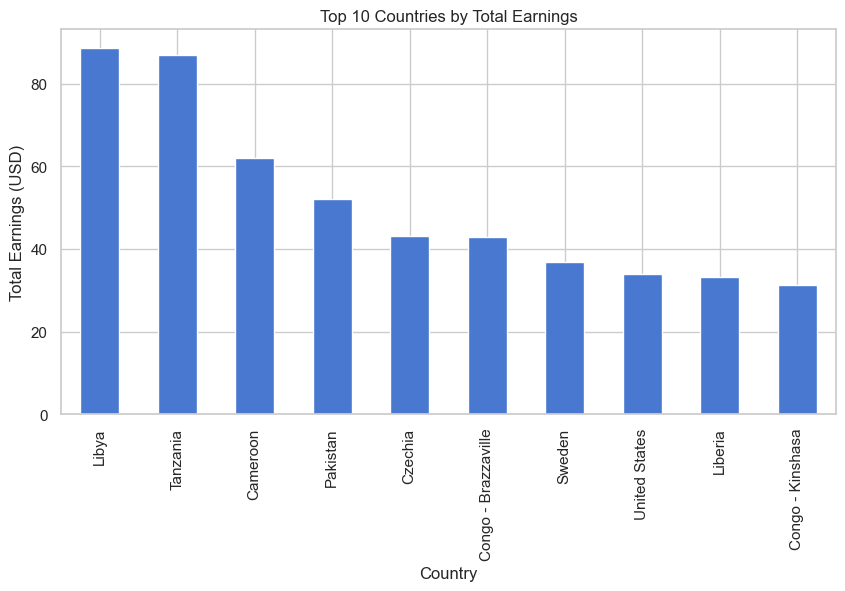

In [6]:
# 🌍 5. Top countries by earnings
top_countries = df.groupby('Country')['Est. earnings (USD)'].sum().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar', figsize=(10,5), title='Top 10 Countries by Total Earnings')
plt.ylabel('Total Earnings (USD)')
plt.show()

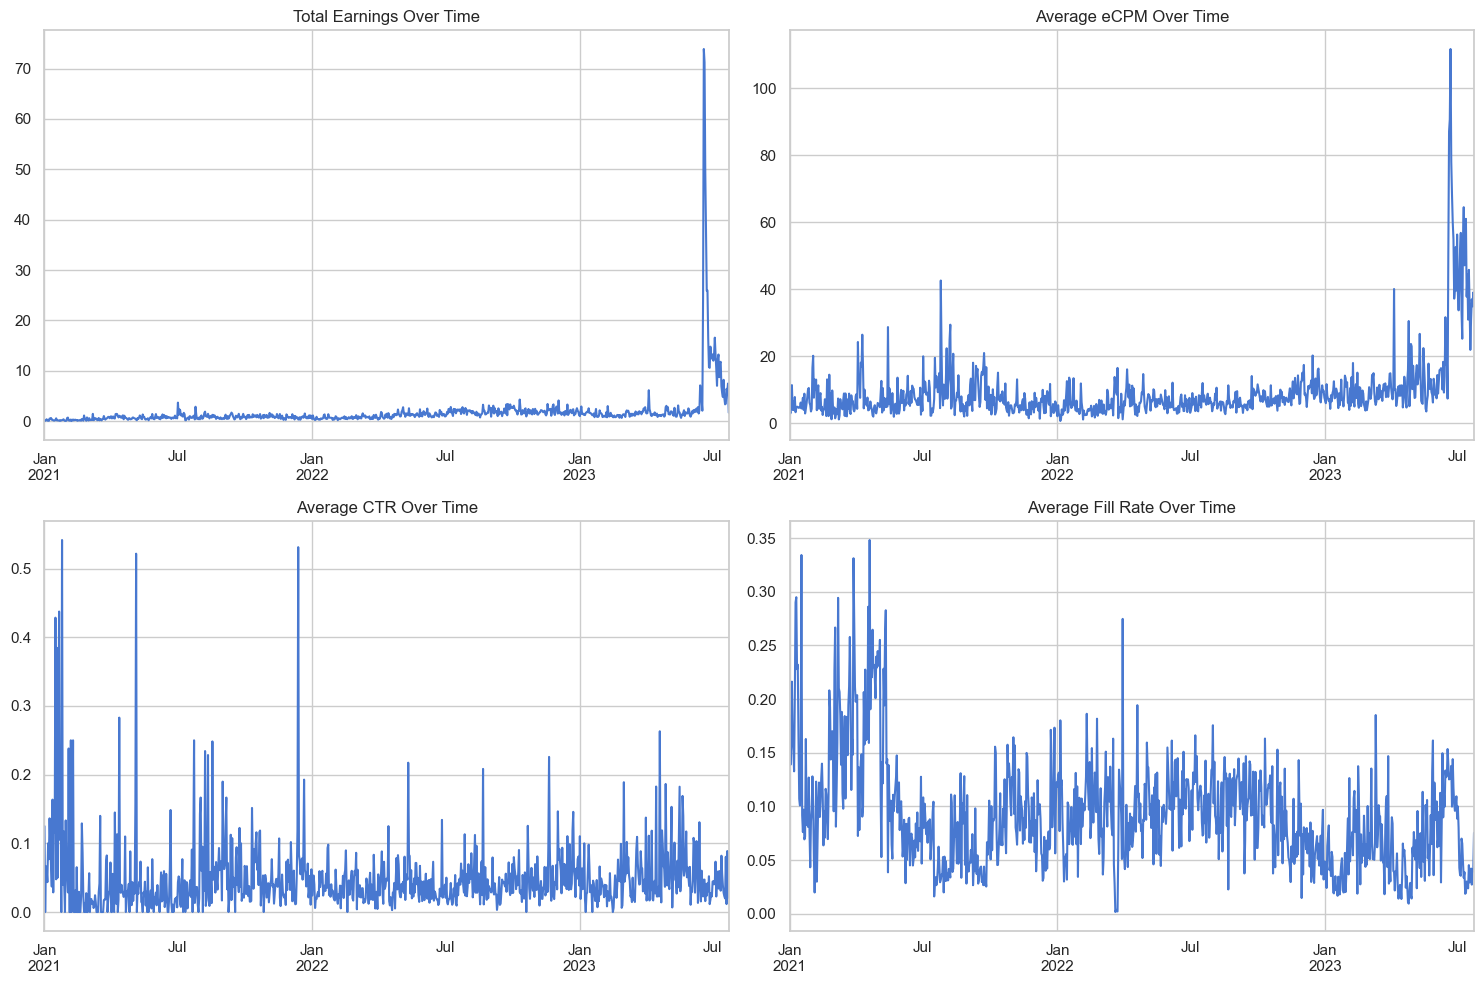

In [7]:
# 📈 6. Time series plots
fig, axs = plt.subplots(2, 2, figsize=(15,10))

df.groupby('Date')['Est. earnings (USD)'].sum().plot(ax=axs[0,0], title='Total Earnings Over Time')
df.groupby('Date')['Observed eCPM (USD)'].mean().plot(ax=axs[0,1], title='Average eCPM Over Time')
df.groupby('Date')['CTR'].mean().plot(ax=axs[1,0], title='Average CTR Over Time')
df.groupby('Date')['Fill Rate'].mean().plot(ax=axs[1,1], title='Average Fill Rate Over Time')

for ax in axs.flat:
    ax.set_xlabel('')
    ax.set_ylabel('')
plt.tight_layout()
plt.show()

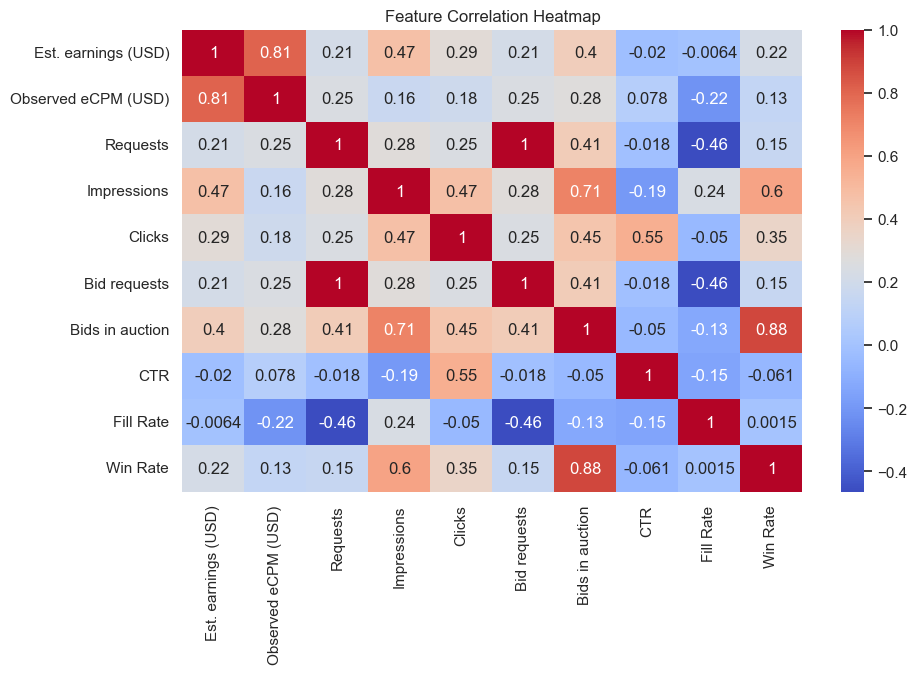

In [8]:
# 🔍 7. Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.drop(columns=['Date', 'Country']).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [9]:
# 🧪 8. Outlier detection (simple z-score method)
from scipy.stats import zscore

metrics_to_check = ['Est. earnings (USD)', 'Observed eCPM (USD)', 'CTR', 'Fill Rate']
z_scores = df[metrics_to_check].apply(zscore)
outliers = (np.abs(z_scores) > 3).sum()
print("Potential outliers (>3 z-score):")
print(outliers)

Potential outliers (>3 z-score):
Est. earnings (USD)     9
Observed eCPM (USD)    25
CTR                    18
Fill Rate              15
dtype: int64


In [10]:
# 📌 9. Daily summary table
daily_summary = df.groupby('Date').agg({
    'Est. earnings (USD)': 'sum',
    'Observed eCPM (USD)': 'mean',
    'Requests': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'CTR': 'mean',
    'Fill Rate': 'mean',
    'Win Rate': 'mean'
}).round(3)

display(daily_summary.tail())

# ✅ DONE
print("EDA completed.")

,Est. earnings (USD),Observed eCPM (USD),Requests,Impressions,Clicks,CTR,Fill Rate,Win Rate
Date,,,,,,,,
2023-07-19,3.47,30.98,2663,112,9,0.08,0.04,0.52
2023-07-20,6.40,36.98,6380,173,2,0.01,0.03,0.34
2023-07-21,5.90,34.91,4118,169,15,0.09,0.04,0.38
2023-07-22,7.46,39.03,4845,191,15,0.08,0.04,0.42
2023-07-23,1.67,34.86,637,48,1,0.02,0.07,0.80


EDA completed.
